In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [67]:
data=pd.read_csv('Trial_Joint_Angles.csv')
X = data.T.iloc[2:]
X.shape

(38, 15793)

In [77]:
# constant value
X = np.full((5, 100), 20)


In [94]:
# random value

X = np.random.rand(10, 100)  # Replace with your actual data

In [85]:
# Sin value

# Generate an array of time points
time_points = np.linspace(0, 2*np.pi, 100)

# Create the matrix X with sinusoidal values
X = np.sin(time_points)

# Repeat the sine wave for each row
X = np.tile(X, (5, 1))

In [17]:
# Create the X matrix with sinusoidal and linear values
num_rows = 2
num_columns = 100

# Generate an array of time points
time_points = np.linspace(0, 2*np.pi, num_columns)

# Create the first row with sinusoidal values
sin_values = np.sin(time_points)

# Create the second row with linearly increasing values
linear_values = np.linspace(0, 1, num_columns)

# Combine the rows to create the matrix X
X = np.vstack((sin_values, linear_values))

# print(X)


In [64]:
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')


window_size = 5
smoothed_data = pd.DataFrame(moving_average(X.iloc[4], window_size))

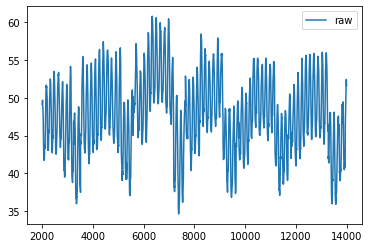

In [73]:
start = 2000
end = 14000
plt.plot(X.iloc[4,start:end], label = 'raw')
#plt.plot(smoothed_data.loc[start:end], label = 'smooth')
plt.legend()

In [69]:
import numpy as np
import pandas as pd
from scipy.linalg import svd

# Construct data matrices for DMD
X1 = X.iloc[:, :-1]
X2 = X.iloc[:, 1:]

# Perform Singular Value Decomposition (SVD)
U, s, Vh = svd(X1, full_matrices=False)

# Truncate the SVD matrices to reduce dimensions
rank =37  # Choose the rank based on desired dimensions
Ur = U[:, :rank]
Sr = np.diag(s)[:rank, :rank]
Vhr = Vh.conj().T[:,:rank]

# Approximate the A matrix using DMD formula
Atilde = np.dot(np.dot(Ur.T, X2), Vhr)@ np.linalg.inv(Sr) 


# Compute eigenvalues and eigenvectors of Atilde
eigenvalues, eigenvectors = np.linalg.eig(Atilde)

# Compute DMD modes
DMD_modes = np.dot(np.dot(X2, Vhr), np.linalg.inv(Sr)) @ eigenvectors
pd.DataFrame(DMD_modes)

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,0.003126+0.007462j,0.003126-0.007462j,-0.010573-0.002129j,-0.010573+0.002129j,-0.000663+0.000000j,0.006150-0.001723j,0.006150+0.001723j,-0.001274+0.001915j,-0.001274-0.001915j,-0.001043+0.001023j,...,-0.012930+0.000438j,0.010420+0.039355j,0.010420-0.039355j,0.038767+0.005791j,0.038767-0.005791j,-0.010131+0.000000j,-0.010588-0.003911j,-0.010588+0.003911j,0.008496+0.000000j,-0.010255+0.000000j
1,0.004433+0.006692j,0.004433-0.006692j,-0.008268-0.008968j,-0.008268+0.008968j,0.001854+0.000000j,0.008225+0.037009j,0.008225-0.037009j,0.010137+0.033590j,0.010137-0.033590j,0.005256-0.044930j,...,0.046424-0.000040j,-0.081450-0.066427j,-0.081450+0.066427j,-0.052954+0.043041j,-0.052954-0.043041j,0.168350+0.000000j,0.143561-0.035370j,0.143561+0.035370j,-0.053935+0.000000j,0.053453+0.000000j
2,-0.005199-0.006604j,-0.005199+0.006604j,0.008400-0.003617j,0.008400+0.003617j,0.000704+0.000000j,-0.003260-0.004559j,-0.003260+0.004559j,-0.006306-0.007381j,-0.006306+0.007381j,0.005318-0.004420j,...,0.023375-0.002138j,0.082130-0.004631j,0.082130+0.004631j,0.024555-0.093853j,0.024555+0.093853j,-0.013030+0.000000j,0.032526-0.002393j,0.032526+0.002393j,-0.054404+0.000000j,0.003878+0.000000j
3,-0.010134+0.006535j,-0.010134-0.006535j,0.019262-0.022915j,0.019262+0.022915j,-0.002377+0.000000j,-0.051179-0.027493j,-0.051179+0.027493j,-0.030606-0.013296j,-0.030606+0.013296j,0.018249-0.000094j,...,0.015662+0.015390j,0.007124-0.035980j,0.007124+0.035980j,-0.009292-0.041560j,-0.009292+0.041560j,0.028844+0.000000j,0.014575-0.004985j,0.014575+0.004985j,0.004678+0.000000j,0.006675+0.000000j
4,-0.017859+0.006782j,-0.017859-0.006782j,0.007507-0.008664j,0.007507+0.008664j,-0.004356+0.000000j,-0.026905-0.060419j,-0.026905+0.060419j,-0.055648-0.064397j,-0.055648+0.064397j,0.076852+0.019603j,...,-0.047046+0.027137j,-0.056229-0.089435j,-0.056229+0.089435j,-0.057542-0.058805j,-0.057542+0.058805j,0.252093+0.000000j,0.215549+0.069717j,0.215549-0.069717j,0.082766+0.000000j,0.002190+0.000000j
5,-0.015487+0.012605j,-0.015487-0.012605j,0.021593-0.001628j,0.021593+0.001628j,-0.002917+0.000000j,-0.015436-0.023961j,-0.015436+0.023961j,-0.014235-0.006206j,-0.014235+0.006206j,0.003567-0.018605j,...,-0.002474+0.002305j,-0.016472-0.021496j,-0.016472+0.021496j,-0.058559-0.003976j,-0.058559+0.003976j,0.003374+0.000000j,0.013963+0.008165j,0.013963-0.008165j,0.002663+0.000000j,0.001766+0.000000j
6,-0.019371-0.001920j,-0.019371+0.001920j,0.009496-0.023683j,0.009496+0.023683j,-0.000038+0.000000j,-0.029694-0.034171j,-0.029694+0.034171j,-0.061784-0.044445j,-0.061784+0.044445j,0.047348+0.011012j,...,-0.003498-0.003536j,0.008459+0.002175j,0.008459-0.002175j,-0.008574+0.002476j,-0.008574-0.002476j,0.035218+0.000000j,0.013353+0.012121j,0.013353-0.012121j,-0.022185+0.000000j,0.001508+0.000000j
7,-0.024948-0.002575j,-0.024948+0.002575j,0.035343-0.014334j,0.035343+0.014334j,-0.002520+0.000000j,-0.013606-0.040129j,-0.013606+0.040129j,-0.043782-0.052598j,-0.043782+0.052598j,0.032400+0.028170j,...,-0.004875+0.016220j,0.031597+0.042823j,0.031597-0.042823j,0.100920+0.026939j,0.100920-0.026939j,0.130187+0.000000j,0.176518+0.124200j,0.176518-0.124200j,-0.057083+0.000000j,0.106760+0.000000j
8,-0.016514+0.006730j,-0.016514-0.006730j,0.026322-0.019218j,0.026322+0.019218j,-0.003249+0.000000j,-0.025193-0.033225j,-0.025193+0.033225j,-0.059790-0.042588j,-0.059790+0.042588j,0.015682+0.004229j,...,-0.012255+0.005593j,-0.022935-0.002095j,-0.022935+0.002095j,-0.056880+0.025395j,-0.056880-0.025395j,-0.022566+0.000000j,0.029037+0.004472j,0.029037-0.004472j,0.012934+0.000000j,0.012822+0.000000j
9,0.001517+0.005510j,0.001517-0.005510j,0.001055-0.006735j,0.001055+0.006735j,-0.001591+0.000000j,-0.006779-0.049663j,-0.006779+0.049663j,-0.029583-0.062952j,-0.029583+0.062952j,0.031876+0.004938j,...,0.017485+0.006324j,0.005005-0.046398j,0.005005+0.046398j,-0.022575-0.022972j,-0.022575+0.022972j,0.064021+0.000000j,-0.005663+0.012511j,-0.005663-0.012511j,-0.020497+0.000000j,-0

In [70]:
eigenvalues

array([0.99045693+0.06834278j, 0.99045693-0.06834278j,
       0.99252983+0.05973896j, 0.99252983-0.05973896j,
       0.95464901+0.j        , 0.9949688 +0.04552707j,
       0.9949688 -0.04552707j, 0.99782067+0.03650897j,
       0.99782067-0.03650897j, 0.99369198+0.02611894j,
       0.99369198-0.02611894j, 0.99607108+0.02003808j,
       0.99607108-0.02003808j, 0.99672998+0.01657171j,
       0.99672998-0.01657171j, 0.98629216+0.j        ,
       0.99710178+0.01293429j, 0.99710178-0.01293429j,
       0.99735421+0.01078052j, 0.99735421-0.01078052j,
       0.99723617+0.00752022j, 0.99723617-0.00752022j,
       0.99705762+0.00625965j, 0.99705762-0.00625965j,
       0.99844058+0.00439315j, 0.99844058-0.00439315j,
       0.99684781+0.00189997j, 0.99684781-0.00189997j,
       0.99904277+0.00213187j, 0.99904277-0.00213187j,
       0.99848683+0.00189329j, 0.99848683-0.00189329j,
       1.00001903+0.j        , 0.99968321+0.00030141j,
       0.99968321-0.00030141j, 0.99874767+0.j        ,
       0.9

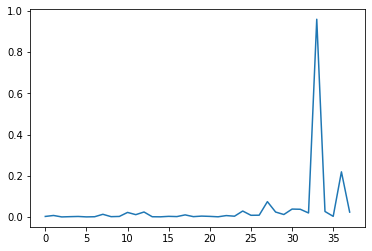

In [27]:
plt.plot(np.abs(DMD_modes[:, 2]))

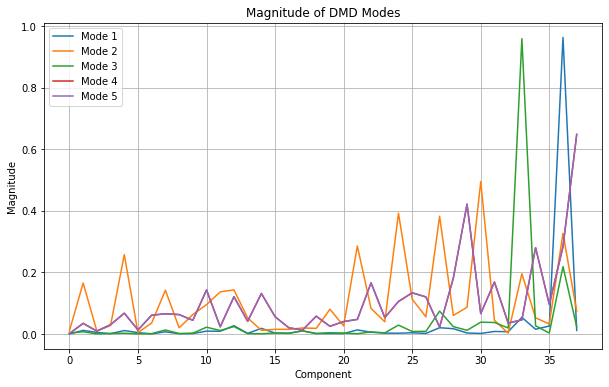

In [26]:
# DMD_modes is a matrix where each column represents a mode

# Plot magnitude of DMD modes
plt.figure(figsize=(10, 6))
for i in range(DMD_modes.shape[1]):
    plt.plot(np.abs(DMD_modes[:, i]), label=f'Mode {i + 1}')
plt.xlabel('Component')
plt.ylabel('Magnitude')
plt.title('Magnitude of DMD Modes')
plt.legend()
plt.grid()
plt.show()


In [ ]:
import numpy as np
from scipy.linalg import svd

# Generate example data
timesteps = 100
features = 5
X = np.random.rand(features, timesteps)  # Replace with your actual data

# Construct data matrices for DMD
X1 = X[:, :-1]
X2 = X[:, 1:]

# Perform Singular Value Decomposition (SVD)
U, s, Vh = svd(X1, full_matrices=False)

# Truncate the SVD matrices to reduce dimensions
rank = 3  # Choose the rank based on desired dimensions
Ur = U[:, :rank]
Sr = np.diag(s)[:rank, :rank]
Vhr = Vh.conj().T[:,:rank]

# Approximate the A matrix using DMD formula
Atilde = np.dot(np.dot(Ur.T, X2), Vhr)@ np.linalg.inv(Sr) 


# Compute eigenvalues and eigenvectors of Atilde
eigenvalues, eigenvectors = np.linalg.eig(Atilde)

# Compute DMD modes
DMD_modes = np.dot(np.dot(X2, Vhr), np.linalg.inv(Sr)) @ eigenvectors

# Make predictions using DMD modes
initial_state = X1[:, -1]
predicted_states = []
for i in range(timesteps):
    predicted_state = np.dot(np.exp(eigenvalues * i), DMD_modes.T) @ initial_state
    predicted_states.append(predicted_state)

predicted_states = np.array(predicted_states).T

# Print the predicted states
print(predicted_states)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have DMD_modes defined previously
# DMD_modes is a matrix where each column represents a mode

# Plot magnitude of DMD modes
plt.figure(figsize=(10, 6))
for i in range(DMD_modes.shape[1]):
    plt.plot(np.abs(DMD_modes[:, i]), label=f'Mode {i + 1}')
plt.xlabel('Component')
plt.ylabel('Magnitude')
plt.title('Magnitude of DMD Modes')
plt.legend()
plt.grid()
plt.show()

# Plot real and imaginary parts of DMD modes
plt.figure(figsize=(10, 6))
for i in range(DMD_modes.shape[1]):
    plt.plot(np.real(DMD_modes[:, i]), label=f'Real - Mode {i + 1}')
    plt.plot(np.imag(DMD_modes[:, i]), label=f'Imaginary - Mode {i + 1}')
plt.xlabel('Component')
plt.ylabel('Value')
plt.title('Real and Imaginary Parts of DMD Modes')
plt.legend()
plt.grid()
plt.show()
